In [1]:
# import packages

import lyricsgenius
import pandas as pd
import requests

from textblob import TextBlob 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

import spacy
from spacy.lang.en import English
nlp = English()
nlp.max_length = 10000000

from gensim.summarization import keywords

[nltk_data] Downloading package stopwords to /Users/0x23/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# search_term = str(input('Enter artist name'))
search_term = 'Dua Lipa'

In [3]:
client_access_token = 'H1FwqolIMEafwAsR6iQ_zBZNrteSUUX5BBGAjNo5oq57TMwW13cg70vlpVj1QJJc'

In [4]:
genius_search_url = f"http://api.genius.com/search?q={search_term}&access_token={client_access_token}"
response = requests.get(genius_search_url)
json_data = response.json()

In [14]:
songs = []
for song in json_data['response']['hits']:
    songs.append([song['result']['title'], song['result']['primary_artist']['name']])
    
#Make a Pandas dataframe from a list
song_df = pd.DataFrame(songs)
song_df.columns = ['song','artist']
song_df

,song,artist
0,New Rules,Dua Lipa
1,Scared to Be Lonely,Martin Garrix & Dua Lipa
2,Don’t Start Now,Dua Lipa
3,IDGAF,Dua Lipa
4,One Kiss,Calvin Harris & Dua Lipa
5,Blow Your Mind (Mwah),Dua Lipa
6,Levitating,Dua Lipa
7,Break My Heart,Dua Lipa
8,Kiss and Make Up,Dua Lipa & BLACKPINK
9,Be the One,Dua Lipa


In [20]:
# Function to return lyrics of each song using Genius API
def get_lyrics(title, artist):
    try:
        return genius.search_song(title, artist).lyrics
    except:
        return 'not found'

# Function to return sentiment score of each song
def get_lyric_sentiment(lyrics):
	analysis = TextBlob(lyrics) 
	return analysis.sentiment.polarity


def get_lyric_subjectivity(lyrics):
	analysis = TextBlob(lyrics) 
	return analysis.sentiment.subjectivity


def get_lyric_magn(sentiment):
	value = 
	return 

# Function to preprocess text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)


# Extract Keywords from text
def return_keywords(texts):
    xkeywords = []
    values = keywords(text=preprocess(texts),split='\n',scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords 
    except:
        return "no content"

In [24]:
print(get_lyric_subjectivity('very good'))

0.7800000000000001


In [15]:
song_df

,song,artist
0,New Rules,Dua Lipa
1,Scared to Be Lonely,Martin Garrix & Dua Lipa
2,Don’t Start Now,Dua Lipa
3,IDGAF,Dua Lipa
4,One Kiss,Calvin Harris & Dua Lipa
5,Blow Your Mind (Mwah),Dua Lipa
6,Levitating,Dua Lipa
7,Break My Heart,Dua Lipa
8,Kiss and Make Up,Dua Lipa & BLACKPINK
9,Be the One,Dua Lipa


In [16]:
genius = lyricsgenius.Genius(client_access_token)

In [17]:
# Use get_lyrics funcion to get lyrics for every song in dataset
lyrics = song_df.apply(lambda row: get_lyrics(row['song'], row['artist']), axis =1)
song_df['Lyrics'] = lyrics
song_df = song_df.drop(song_df[song_df['Lyrics'] == 'not found'].index) #

Searching for "New Rules" by Dua Lipa...
Searching for "Scared to Be Lonely" by Martin Garrix & Dua Lipa...
Done.
Searching for "Don’t Start Now" by Dua Lipa...
Done.
Searching for "IDGAF" by Dua Lipa...
Done.
Searching for "One Kiss" by Calvin Harris & Dua Lipa...
Done.
Searching for "Blow Your Mind (Mwah)" by Dua Lipa...
Searching for "Levitating" by Dua Lipa...
Done.
Searching for "Break My Heart" by Dua Lipa...
Done.
Searching for "Kiss and Make Up" by Dua Lipa & BLACKPINK...
Done.
Searching for "Be the One" by Dua Lipa...
Done.


In [18]:
# Use get_lyric_sentiment to get sentiment score for all the song lyrics
sentiment = song_df.apply(lambda row: get_lyric_sentiment(row['Lyrics']), axis =1)
song_df['Sentiment'] = sentiment

In [51]:
subjectivity = song_df.apply(lambda row: get_lyric_subjectivity(row['Lyrics']), axis =1)
song_df['Subjectivity'] = subjectivity

In [114]:
song_df

,song,artist,Lyrics,Sentiment,Subjectivity
1,Scared to Be Lonely,Martin Garrix & Dua Lipa,[Verse 1]\nIt was great at the very start\nHan...,0.062500,0.640833
2,Don’t Start Now,Dua Lipa,[Intro]\nIf you don't wanna see me\n\n[Verse 1...,0.047727,0.502273
3,IDGAF,Dua Lipa,[Verse 1]\nYou call me all friendly\nTellin' m...,-0.030645,0.556452
4,One Kiss,Calvin Harris & Dua Lipa,[Intro]\nOne kiss is all it takes\nFallin' in ...,0.466667,0.625000
6,Levitating,Dua Lipa,"[Verse 1]\nIf you wanna run away with me, I kn...",0.639423,0.838462
7,Break My Heart,Dua Lipa,[Verse 1]\nI've always been the one to say the...,0.271739,0.587923
8,Kiss and Make Up,Dua Lipa & BLACKPINK,[Verse 1: Dua Lipa]\nWe haven't talked all mor...,-0.173913,0.632971
9,Be the One,Dua Lipa,"[Verse 1]\nI see the moon, I see the moon, I s...",-0.218519,0.412963


In [115]:
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")

x = np.array(song_df['Sentiment'].tolist())
y = np.array(song_df['Subjectivity'].tolist())


In [121]:
x = np.sort(x)

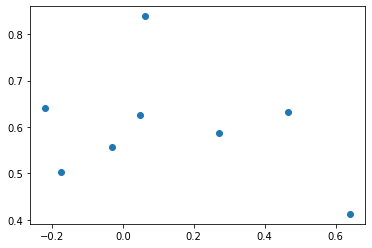

In [122]:
plt.scatter(x, y);


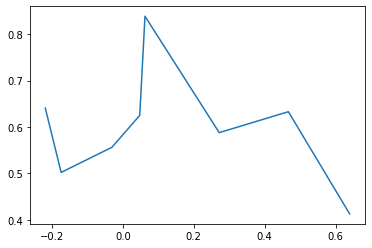

In [123]:
plt.plot(x,y)

In [124]:
from scipy.interpolate import make_interp_spline, BSpline

xnew = np.linspace(x.min(), x.max(), 200) 

In [125]:
#define spline
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(xnew)

In [ ]:
#create smooth line chart 
plt.plot(xnew, y_smooth)
plt.show()

----------